# Análisis y Predicción de Precios de Autos (Core)

<strong>Objetivo:</strong> Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

<strong>Dataset:</strong> [Automobile Dataset](https://www.kaggle.com/datasets/toramky/automobile-dataset)

<strong>Descripción del Dataset:</strong> Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

## Instrucciones

### Parte 1: Análisis Exploratorio de Datos (EDA)

#### 1. Carga y Exploración de Datos:

* Cargar el dataset y revisar la estructura básica.
* Descripción de las variables y su distribución.
* Detección y tratamiento de valores nulos.
* Identificación y tratamiento de outliers.
* Análisis de correlación entre variables.

### Parte 2: Preparación de Datos

#### 2. Preprocesamiento:

* Selección de características importantes.
* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

### Parte 3: Modelos de Regresión

#### 3. Regresión Lineal:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

#### 4. K-Nearest Neighbors (KNN):

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

#### 5. Árbol de Decisión:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

### Parte 4: Benchmarking y Comparación de Modelos

#### 6. Comparación de Modelos:

* Comparar los resultados de los tres modelos en términos de MSE y R².
* Discusión sobre las diferencias en el rendimiento de los modelos.

### Conclusión

#### 7. Interpretación de Resultados:

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

### Tareas Adicionales y Desafíos

#### 8. Desafíos Adicionales:

* <strong>Optimización de Modelos:</strong> Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
* <strong>Feature Engineering:</strong> Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
* <strong>Validación Cruzada:</strong> Implementar validación cruzada para evaluar la estabilidad de los modelos.

<strong>Nota:</strong> Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

# Resolución

## Parte 1: Análisis Exploratorio de Datos (EDA)

* Cargar el dataset y revisar la estructura básica.

In [3002]:
import pandas as pd

camino_ds = "../data/Automobile_data.csv"
df = pd.read_csv(camino_ds, delimiter=",")

* Descripción de las variables y su distribución

In [3003]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3004]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


Nota: Más datos de la columna symboling se puede encotrar [aquí](https://rstudio-pubs-static.s3.amazonaws.com/345340_a8ed48c5ed094a94a4d60242a8c94a24.html). Es un indicador de riesgo del vehículo. De acuerdo al artículo, los datos vistos en las estadísticas para estas columnas parecen correctos.

Verificación de duplicados

In [3005]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


Al parecer, no existen datos nulos en este dataset.

* Limpieza de variables categóricas

In [3006]:
from eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [3007]:
for columna_categorica in columnas_categoricas:
    valores_unicos = list(df[columna_categorica].unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna normalized-losses: ['?', '164', '158', '192', '188', '121', '98', '81', '118', '148', '110', '145', '137', '101', '78', '106', '85', '107', '104', '113', '150', '129', '115', '93', '142', '161', '153', '125', '128', '122', '103', '168', '108', '194', '231', '119', '154', '74', '186', '83', '102', '89', '87', '77', '91', '134', '65', '197', '90', '94', '256', '95']
Valores únicos en columna make: ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Valores únicos en columna fuel-type: ['gas', 'diesel']
Valores únicos en columna aspiration: ['std', 'turbo']
Valores únicos en columna num-of-doors: ['two', 'four', '?']
Valores únicos en columna body-style: ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Valores únicos en columna drive-wheels: ['rwd', 'fwd', '4wd']
Valores ú

Al parecer, hay varias columnas que deberían ser numéricos pero no lo son. Se procede a detectar y corregir los errores.

In [3008]:
import numpy as np


def limpiar_signos_interrogacion(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

df["normalized-losses"] = df["normalized-losses"].apply(limpiar_signos_interrogacion)
df["bore"] = df["bore"].apply(limpiar_signos_interrogacion)
df["stroke"] = df["stroke"].apply(limpiar_signos_interrogacion)
df["horsepower"] = df["horsepower"].apply(limpiar_signos_interrogacion)
df["peak-rpm"] = df["peak-rpm"].apply(limpiar_signos_interrogacion)
df["price"] = df["price"].apply(limpiar_signos_interrogacion)

In [3009]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3010]:
columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

Convertimos las variables categóricas a cadenas.

In [3011]:
for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].astype("string")

* Detección y tratamiento de valores nulos.

In [3012]:
from eda_utils import obtener_estadisticas_datos_nulos

obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
price,201,4,1.95
stroke,201,4,1.95
bore,201,4,1.95
peak-rpm,203,2,0.98
horsepower,203,2,0.98
highway-mpg,205,0,0.00
city-mpg,205,0,0.00
compression-ratio,205,0,0.00
fuel-system,205,0,0.00


In [3013]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
price,201,4,1.95
stroke,201,4,1.95
bore,201,4,1.95
peak-rpm,203,2,0.98
horsepower,203,2,0.98
highway-mpg,205,0,0.00
city-mpg,205,0,0.00
compression-ratio,205,0,0.00
fuel-system,205,0,0.00


In [3014]:
df[df["normalized-losses"].isna()].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


Sacamos estadísticas para ver si la pérdida normalizada se puede imputar.

In [3015]:
from eda_utils import obtener_estadisticas_descriptivas_df_es

obtener_estadisticas_descriptivas_df_es(df).T

,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
symboling,-2.00,3.00,0.834146,1.245307,1.00,1.492912
normalized-losses,65.00,256.00,122.000000,35.442168,115.00,0.290510
wheel-base,86.60,120.90,98.756585,6.021776,97.00,0.060976
length,141.10,208.10,174.049268,12.337289,173.20,0.070884
width,60.30,72.30,65.907805,2.145204,65.50,0.032549
height,47.80,59.80,53.724878,2.443522,54.10,0.045482
curb-weight,1488.00,4066.00,2555.565854,520.680204,2414.00,0.203744
engine-size,61.00,326.00,126.907317,41.642693,120.00,0.328135
bore,2.54,3.94,3.329751,0.273539,3.31,0.082150
stroke,2.07,4.17,3.255423,0.316717,3.29,0.097289


En el caso de normalized-losses, el coeficiente de variación es menor al 30%, por lo que se opta imputar el promedio en esta columna.

In [3016]:
promedio_normalized_losses = df["normalized-losses"].mean()

df["normalized-losses"] = df["normalized-losses"].apply(lambda x: x if not pd.isna(x) else promedio_normalized_losses)


In [3017]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
price,201,4,1.95
stroke,201,4,1.95
bore,201,4,1.95
peak-rpm,203,2,0.98
horsepower,203,2,0.98
normalized-losses,205,0,0.00
highway-mpg,205,0,0.00
city-mpg,205,0,0.00
compression-ratio,205,0,0.00
fuel-system,205,0,0.00


Verificamos la columna precio

In [3018]:
df[df["price"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


Debido a que esta columna depende de cada vehículo, es difícil imputar un valor estadístico. Además, al estar vacío el precio, estos valores no podrán ser utilizados para entrenar modelos de predicciones más adelante. Por lo que se procede a eliminar estas columnas.

In [3019]:
df.drop(df[df["price"].isna()].index, inplace=True)

In [3020]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
stroke,197,4,1.99
bore,197,4,1.99
peak-rpm,199,2,1.00
horsepower,199,2,1.00
symboling,201,0,0.00
normalized-losses,201,0,0.00
highway-mpg,201,0,0.00
city-mpg,201,0,0.00
compression-ratio,201,0,0.00
fuel-system,201,0,0.00


Verificamos ahora la columna stroke.

In [3021]:
df[df["stroke"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [3022]:
obtener_estadisticas_descriptivas_df_es(df).T

,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
symboling,-2.00,3.00,0.840796,1.254802,1.00,1.492397
normalized-losses,65.00,256.00,122.000000,31.996250,122.00,0.262264
wheel-base,86.60,120.90,98.797015,6.066366,97.00,0.061402
length,141.10,208.10,174.200995,12.322175,173.20,0.070735
width,60.30,72.00,65.889055,2.101471,65.50,0.031894
height,47.80,59.80,53.766667,2.447822,54.10,0.045527
curb-weight,1488.00,4066.00,2555.666667,517.296727,2414.00,0.202412
engine-size,61.00,326.00,126.875622,41.546834,120.00,0.327461
bore,2.54,3.94,3.330711,0.270793,3.31,0.081302
stroke,2.07,4.17,3.256904,0.319256,3.29,0.098024


Se puede notar que tanto las columnas bore como stroke son nulos a través del filtro. Como ambos campos también pueden potencialmente afectar al precio, se opta por no usar estos valores y se los elimina del dataset.

In [3023]:
df.drop(df[df["stroke"].isna()].index, inplace=True)
df.drop(df[df["bore"].isna()].index, inplace=True)

In [3024]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
peak-rpm,195,2,1.02
horsepower,195,2,1.02
symboling,197,0,0.00
normalized-losses,197,0,0.00
highway-mpg,197,0,0.00
city-mpg,197,0,0.00
compression-ratio,197,0,0.00
stroke,197,0,0.00
bore,197,0,0.00
fuel-system,197,0,0.00


Verificamos la columna peak-rpm

In [3025]:
df[df["peak-rpm"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


Verificamos si no hay algún motor con las mismas prestaciones.

In [3026]:
df[(df["bore"] == 3.46) & (df["stroke"] == 3.9)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


Al parecer no hay ningún dato similar que se pueda utilizar, y para prevenir que afecte los modelos de predicción, se eliminan del dataset.

In [3027]:
df.drop(df[df["peak-rpm"].isna()].index, inplace=True)

In [3028]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
symboling,195,0,0.0
normalized-losses,195,0,0.0
highway-mpg,195,0,0.0
city-mpg,195,0,0.0
peak-rpm,195,0,0.0
horsepower,195,0,0.0
compression-ratio,195,0,0.0
stroke,195,0,0.0
bore,195,0,0.0
fuel-system,195,0,0.0


Ya no hay datos nulos en el dataset.

In [3029]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    float64
 2   make               195 non-null    string 
 3   fuel-type          195 non-null    string 
 4   aspiration         195 non-null    string 
 5   num-of-doors       195 non-null    string 
 6   body-style         195 non-null    string 
 7   drive-wheels       195 non-null    string 
 8   engine-location    195 non-null    string 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    string 
 15  num-of-cylinders   195 non-null    string 
 16  engine-size        195 non-null

* Limpieza de variables categóricas

In [3030]:
columnas_categoricas = obtener_columnas_categoricas_df(df)

for columna_categorica in columnas_categoricas:
    valores_unicos = list(df[columna_categorica].unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna make: ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Valores únicos en columna fuel-type: ['gas', 'diesel']
Valores únicos en columna aspiration: ['std', 'turbo']
Valores únicos en columna num-of-doors: ['two', 'four', '?']
Valores únicos en columna body-style: ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Valores únicos en columna drive-wheels: ['rwd', 'fwd', '4wd']
Valores únicos en columna engine-location: ['front', 'rear']
Valores únicos en columna engine-type: ['dohc', 'ohcv', 'ohc', 'l', 'ohcf']
Valores únicos en columna num-of-cylinders: ['four', 'six', 'five', 'three', 'twelve', 'eight']
Valores únicos en columna fuel-system: ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi']


In [3031]:
from eda_utils import limpiar_cadena


for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

In [3032]:
for columna_categorica in columnas_categoricas:
    valores_unicos = list(df[columna_categorica].unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna make: ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Valores únicos en columna fuel-type: ['gas', 'diesel']
Valores únicos en columna aspiration: ['std', 'turbo']
Valores únicos en columna num-of-doors: ['two', 'four', '?']
Valores únicos en columna body-style: ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
Valores únicos en columna drive-wheels: ['rwd', 'fwd', '4wd']
Valores únicos en columna engine-location: ['front', 'rear']
Valores únicos en columna engine-type: ['dohc', 'ohcv', 'ohc', 'l', 'ohcf']
Valores únicos en columna num-of-cylinders: ['four', 'six', 'five', 'three', 'twelve', 'eight']
Valores únicos en columna fuel-system: ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi']


Convertimos el nro de cilindros a enteros.

In [3033]:
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [3034]:
def _num_cilindros_a_entero(x):
    if x == "four":
        return 4

    if x == "six":
        return 6

    if x == "five":
        return 5

    if x == "three":
        return 3

    if x == "twelve":
        return 12

    return 8

df["num-of-cylinders"] = df["num-of-cylinders"].apply(_num_cilindros_a_entero)

Convertimos los campos a su tipo correcto.

In [3035]:
columnas_categoricas = obtener_columnas_categoricas_df(df)

for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    float64
 2   make               195 non-null    string 
 3   fuel-type          195 non-null    string 
 4   aspiration         195 non-null    string 
 5   num-of-doors       195 non-null    string 
 6   body-style         195 non-null    string 
 7   drive-wheels       195 non-null    string 
 8   engine-location    195 non-null    string 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    string 
 15  num-of-cylinders   195 non-null    int64  
 16  engine-size        195 non-null

* Identificación y tratamiento de outliers.

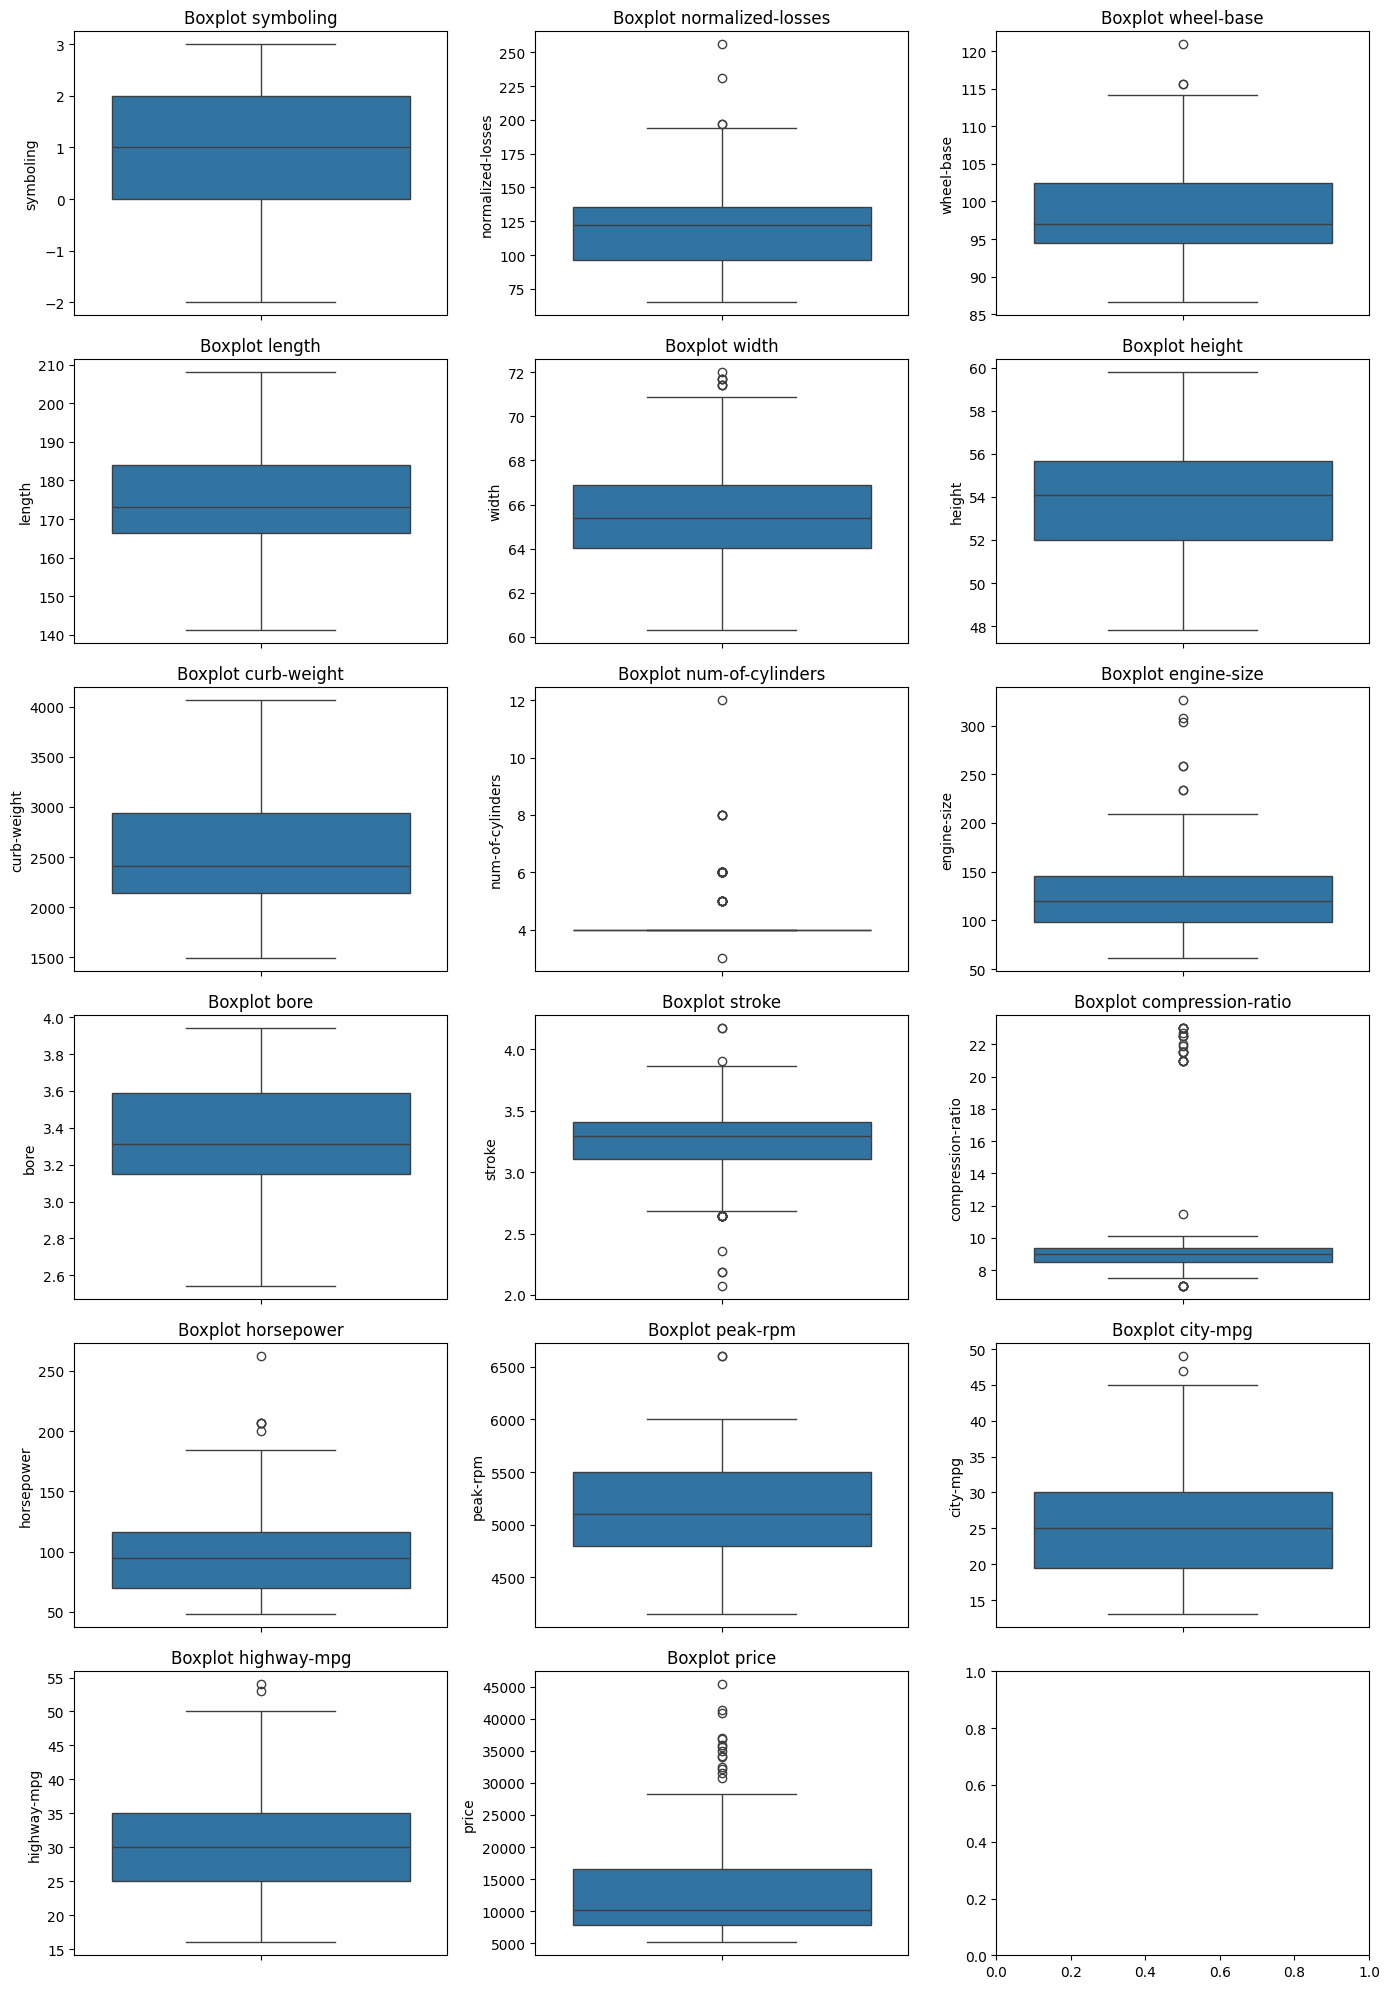

In [3036]:
from eda_utils import obtener_columnas_numericas_df, graficar_boxplots

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_boxplots(df, columnas_numericas, figsize=(14, 20))

Se puede notar que existen varios outliers en las características de los vehículos. No obstante todas estas columnas pueden afectar al precio, por lo que se mantienen en el dataset.

* Análisis de correlación entre variables.

Graficamos un mapa de calor de correlación entre todas las variables.

In [3037]:
# Cálculo de la correlación de Pearson
correlation_matrix = df[[*columnas_numericas]].corr(method='pearson')
print(correlation_matrix)

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.454447   -0.535565 -0.363063   
normalized-losses   0.454447           1.000000   -0.046860  0.027179   
wheel-base         -0.535565          -0.046860    1.000000  0.879222   
length             -0.363063           0.027179    0.879222  1.000000   
width              -0.248580           0.089103    0.819009  0.858084   
height             -0.517540          -0.358772    0.592500  0.496218   
curb-weight        -0.230350           0.105333    0.782720  0.881665   
num-of-cylinders   -0.042696           0.160980    0.340352  0.447544   
engine-size        -0.068284           0.139265    0.569704  0.687479   
bore               -0.145823          -0.030158    0.498228  0.609437   
stroke             -0.011971           0.056387    0.171722  0.118664   
compression-ratio  -0.181258          -0.112238    0.247730  0.160172   
horsepower          0.072655           0.216473    

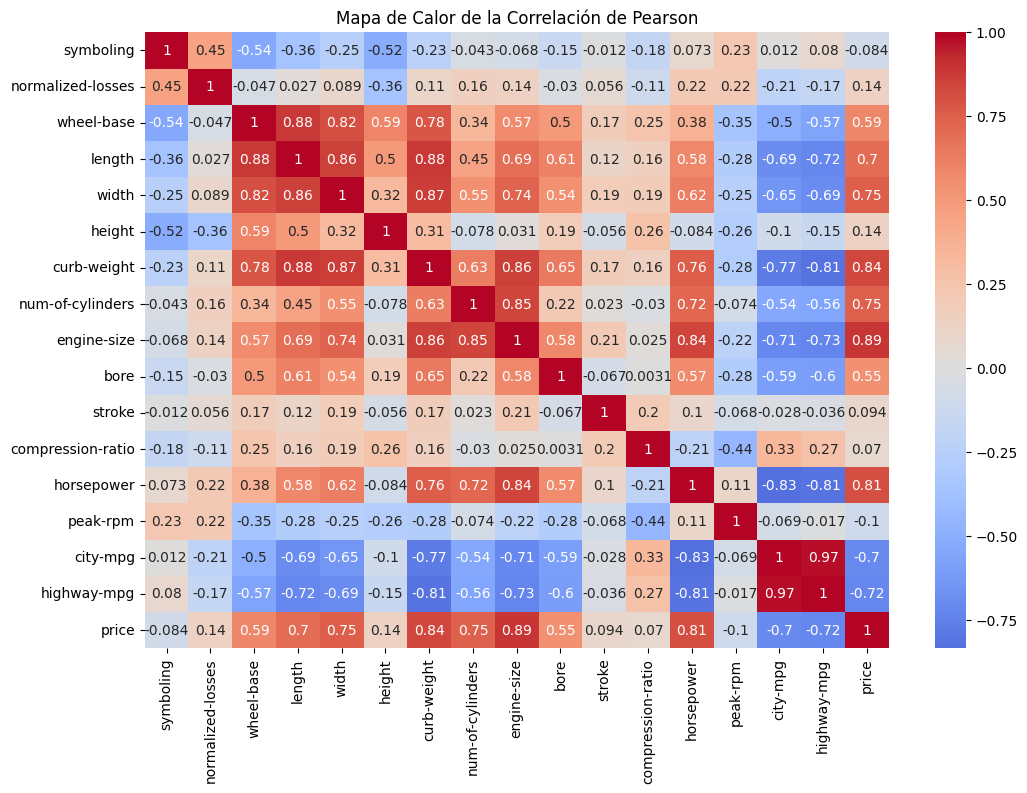

In [3038]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

De el gráfico de correlación, podemos notar que los siguientes campos parecen estar correlacionados con el precio:

* length
* width
* curb-height
* engine-size
* bore
* horsepower

Estos campos se tendrán en cuenta para entrenar los modelos más adelante.

In [3039]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    float64
 2   make               195 non-null    string 
 3   fuel-type          195 non-null    string 
 4   aspiration         195 non-null    string 
 5   num-of-doors       195 non-null    string 
 6   body-style         195 non-null    string 
 7   drive-wheels       195 non-null    string 
 8   engine-location    195 non-null    string 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    string 
 15  num-of-cylinders   195 non-null    int64  
 16  engine-size        195 non-null

## Parte 2: Preprocesamiento

#### 2. Preprocesamiento

* Selección de características importantes, transformación de variables categóricas, División del conjunto de datos en entrenamiento y prueba, escalado de características.

Probamos con los campos que no sean de riesgo y de pérdidas.

In [3040]:
columnas_df = df.columns.tolist()

columnas_df

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [3041]:
campo_salida = "price"
campos_entrada = columnas_df

campos_entrada.remove("price")
campos_entrada.remove("symboling")
campos_entrada.remove("normalized-losses")

# Se quitan las columnas que no muestran correlación.
# Se hicieron varias pruebas agregando y eliminando estas
# columnas y se llegó a la conclusión que las habilitadas
# son las que mejor performan.
columnas_numericas_prediccion = [
    "wheel-base",
    "length",
    "width", 
    # "height",
    "curb-weight",
    "engine-size",
    # "bore",
    # "stroke",
    # "compression-ratio",
    "horsepower",
    # "peak-rpm",
    "city-mpg",
    "highway-mpg",
    # "num-of-cylinders",
]

columnas_categoricas_prediccion = [
    "make",
    "fuel-type",
    # "aspiration",
    "num-of-doors",
    # "body-style",
    # "drive-wheels",
    # "engine-location",
    "engine-type",
    "fuel-system",
]

X = df[[*columnas_numericas_prediccion] + [*columnas_categoricas_prediccion]]
y = df[campo_salida]

En el código previo, se eligieron solamente las columnas que más afectaban los resultados por método de prueba y error hasta llegar un porcentaje de 95% approx. en el modelo de regresión lineal.

In [3042]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
        ("cat", categorical_transformer, columnas_categoricas_prediccion),
    ]
)

X_transformed = preprocessor.fit_transform(X)

# Dividimos el dataset en 80% para entrenamiento y 20% para testeo de acuerdo a lo indicado en el ejercicio.
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,
    y,
    test_size=0.2,
    random_state=0,
)


## Parte 3: Modelos de Regresión

### 3. Regresión Lineal:

* Entrenamiento del modelo.

In [3043]:
from sklearn.linear_model import LinearRegression

modelo_reg_lineal = LinearRegression()
modelo_reg_lineal.fit(X_train, y_train)

LinearRegression()

* Evaluación del rendimiento (MSE y R²).

In [3044]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# Realizar predicciones
y_pred_reg_lineal = modelo_reg_lineal.predict(X_test)

# Evaluar el modelo
rmse_reg_lineal = root_mean_squared_error(y_test, y_pred_reg_lineal)
mse_reg_lineal = rmse_reg_lineal ** 2
r2_reg_lineal = r2_score(y_test, y_pred_reg_lineal)
mae_reg_lineal = mean_absolute_error(y_test, y_pred_reg_lineal)

print(f'Error Cuadrático Medio: {mse_reg_lineal}')
print(f'Error Cuadrático Medio Raíz: {rmse_reg_lineal}')
print(f'R-cuadrado: {r2_reg_lineal}')
print(f'Error Absoluto Medio: {mae_reg_lineal}')

Error Cuadrático Medio: 3540393.0472963285
Error Cuadrático Medio Raíz: 1881.5932204640642
R-cuadrado: 0.9501167385801483
Error Absoluto Medio: 1370.478646281686


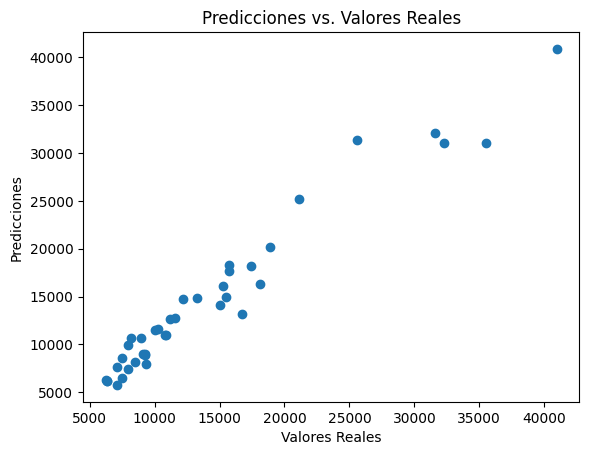

In [3045]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_reg_lineal)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Se puede notar una aproximación cercana usando una regresión lineal. Valores como r2 y rmse también indican que el modelo es relativamente bueno.

### 4. K-Nearest Neighbors (KNN):

* Entrenamiento del modelo

Encontramos el mejor valor de K con validación cruzada.

In [3046]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Probar diferentes valores de K
k_values = list(range(1, 20))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 2


Visualizamos como va cambiando el MSE con diferentes valores de K

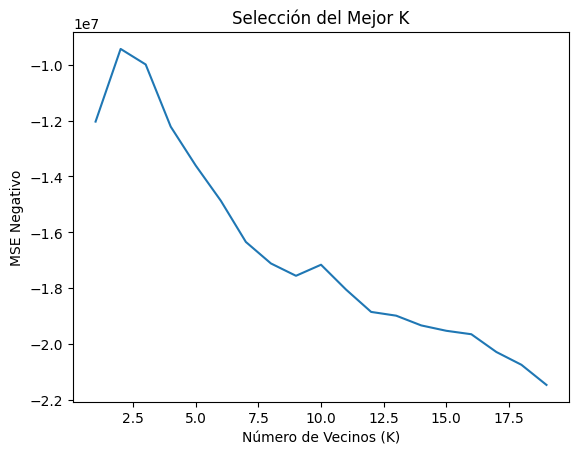

In [3047]:
plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

In [3048]:
# Entrenamiento del modelo KNN
modelo_knn = KNeighborsRegressor(n_neighbors=best_k)
modelo_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

* Evaluación del rendimiento (MSE y R²).

In [3049]:
# Realizar predicciones
y_pred_knn = modelo_knn.predict(X_test)

# Evaluar el modelo
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'Error Cuadrático Medio: {mse_knn}')
print(f'Error Cuadrático Medio Raíz: {rmse_knn}')
print(f'R-cuadrado: {r2_knn}')
print(f'Error Absoluto Medio: {mae_knn}')

Error Cuadrático Medio: 4000816.801282051
Error Cuadrático Medio Raíz: 2000.2041898971343
R-cuadrado: 0.9436294818893922
Error Absoluto Medio: 1580.2692307692307


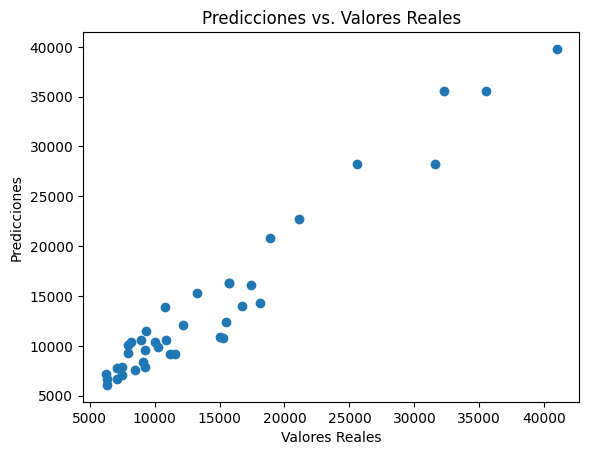

In [3050]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### 5. Árbol de Decisión:

* Entrenamiento del modelo

In [3051]:
from sklearn.tree import DecisionTreeRegressor

# Entrenamiento del modelo Árbol de Decisión
modelo_arbol = DecisionTreeRegressor(random_state=0)
modelo_arbol.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

* Evaluación del rendimiento (MSE y R²).

In [3052]:
# Realizar predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Evaluar el modelo
rmse_arbol = root_mean_squared_error(y_test, y_pred_arbol)
mse_arbol = rmse_arbol ** 2
r2_arbol = r2_score(y_test, y_pred_arbol)
mae_arbol = mean_absolute_error(y_test, y_pred_arbol)

print(f'Error Cuadrático Medio: {mse_arbol}')
print(f'Error Cuadrático Medio Raíz: {rmse_arbol}')
print(f'R-cuadrado: {r2_arbol}')
print(f'Error Absoluto Medio: {mae_arbol}')

Error Cuadrático Medio: 4233546.948717949
Error Cuadrático Medio Raíz: 2057.558492174147
R-cuadrado: 0.9403503717370064
Error Absoluto Medio: 1401.2051282051282


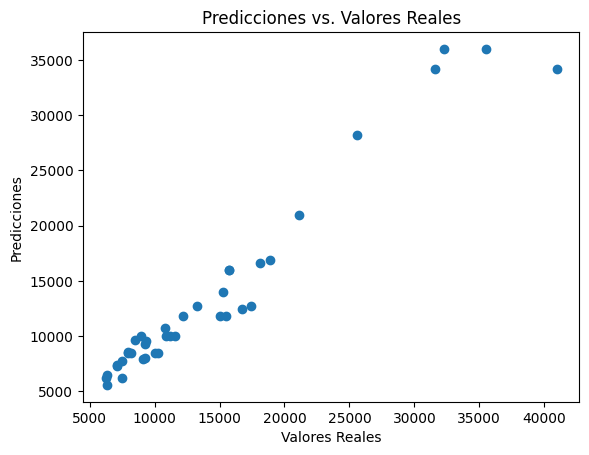

In [3053]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_arbol)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

## Parte 4: Benchmarking y Comparación de Modelos

* Comparar los resultados de los tres modelos en términos de MSE y R².

In [3057]:
df_resultados = pd.DataFrame([
    ("Regresión Lineal", r2_reg_lineal, rmse_reg_lineal, mse_reg_lineal, mae_reg_lineal),
    ("KNN", r2_knn, rmse_knn, mse_knn, mae_knn),
    ("Árbol de Decisión", r2_arbol, rmse_arbol, mse_arbol, mae_arbol),
], columns=["Método", "R2", "RMSE", "MSE", "MAE"])

df_resultados

,Método,R2,RMSE,MSE,MAE
0,Regresión Lineal,0.950117,1881.593220,3.540393e+06,1370.478646
1,KNN,0.943629,2000.204190,4.000817e+06,1580.269231
2,Árbol de Decisión,0.940350,2057.558492,4.233547e+06,1401.205128


* Discusión sobre las diferencias en el rendimiento de los modelos.

Según los resultados, la regresión lineal es la que tiene mayor R2 y a la vez menor RMSE, por lo que se puede concluír que es el más preciso de entre los 3.

## Conclusión

### 7. Interpretación de Resultados

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

De los tres, el más adecuado es la regresión lineal ya que tiene el mejor rendimiento con los parámetros elegidos

* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

El ajuste de hiperparámetros se hizo sólamente para el método de regresión K Nearest neighbour.

En el caso de KNN, quedan varios otros parámetros por probar como por ej: wheight, algorithm, leaf_size, entre otros.

Y en el caso del Árbol, también hay otros parámetros que se pueden optimizar como max_depth, min_samples_split, entre otros.